# Micro Credit Fraud Analysis

# Data Preprocessing

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Data
df=pd.read_csv("micro_credit.csv")
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
# checking for null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [4]:
# checking for unique values and their value counts
for col in df:
    print((col),df[col].unique())
    print(df[col].value_counts())
    print('******************************************************************************************')
    print('\n')

Unnamed: 0 [     1      2      3 ... 209591 209592 209593]
2047      1
41537     1
62027     1
64074     1
57929     1
         ..
105881    1
103832    1
126359    1
124310    1
2049      1
Name: Unnamed: 0, Length: 209593, dtype: int64
******************************************************************************************


label [0 1]
1    183431
0     26162
Name: label, dtype: int64
******************************************************************************************


msisdn ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
47819I90840    7
04581I85330    7
87592I84456    6
30080I90588    6
71742I90843    6
              ..
86561I82737    1
59783I70373    1
39754I84458    1
67566I90584    1
64367I90849    1
Name: msisdn, Length: 186243, dtype: int64
******************************************************************************************


aon [2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.118813

medianamnt_ma_rech90 [ 1539.   5787.    947.   2888.   3178.    773.   1156.   4532.5  1720.
     0.   4769.5   771.5   770.   3178.5  1543.   1160.   2309.   4048.
  6024.   1247.   1924.   2803.   8000.   3278.5   173.  10250.   2020.
  3193.   1243.   1547.   3613.   3855.5  2358.5  5359.5  1928.   1541.
  2410.5  2320.   1731.5  9937.   7480.    473.   1154.5  4773.5  1158.5
   856.  10000.   4067.   2593.   5804.   3676.5  1333.   3467.   5154.5
  5814.  11874.    471.5  1353.   3569.   1929.5  1633.5   858.5  2409.
  2314.5  2551.   7763.   4149.5  4917.   9663.5  1546.5  1347.   2743.5
  6670.   3757.5  2793.5  3622.5  2749.    860.   2893.   1539.5  2370.
  4473.5  1736.   2507.   1821.    772.5  7526.   2797.5  1928.5  4496.
  1683.   7400.   2451.   2014.5  1974.   3293.5 16000.   2362.5  4385.
  4057.5  3663.   1176.5  7091.5  4253.5  1629.5  7607.   7560.   5733.5
  2751.  15400.   1933.   2556.5  4631.   4047.5  5065.5  1628.   1933.5
  2066.   4917.5  3228.   2503.   2986

maxamnt_loans30 [6.00000000e+00 1.20000000e+01 0.00000000e+00 ... 9.28645017e+04
 5.42592657e+04 9.69272433e+04]
6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
                 ...  
26462.333521         1
53666.885900         1
67319.013426         1
36610.121211         1
28708.879352         1
Name: maxamnt_loans30, Length: 1050, dtype: int64
******************************************************************************************


medianamnt_loans30 [0.  1.  0.5 2.  1.5 3. ]
0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64
******************************************************************************************


cnt_loans90 [2.00000000e+00 1.00000000e+00 7.00000000e+00 ... 3.02706822e+03
 4.47977118e+03 2.04790245e+03]
1.000000       73862
2.000000       37286
3.000000       23986
4.000000       16761
5.000000       12331
               .

In [5]:
#Checking Datatypes 
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
# changing the Date column into actual date format


df['pdate'] = pd.to_datetime(df['pdate'])
df.pdate.head()

0   2016-07-20
1   2016-08-10
2   2016-08-19
3   2016-06-06
4   2016-06-22
Name: pdate, dtype: datetime64[ns]

In [8]:
#Splitting time stamp format data to day, month & year

df["day"]=df["pdate"].dt.day
df["month"]=df["pdate"].dt.month
df["year"]=df["pdate"].dt.year
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,day,month,year
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,20,7,2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,10,8,2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,19,8,2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,6,6,2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,22,6,2016


In [9]:
# dropping the unnecessary columns
df.drop('Unnamed: 0',axis=1,inplace=True)  # index column we also have already in our dataframe
df.drop('msisdn',axis=1,inplace=True)      # contains phone numbers not so relevant 
df.drop('pdate',axis=1,inplace=True)       # we already split this column to day, month, year 
df.drop('year',axis=1,inplace=True)        # contains same value i,e '2016' in every row
df.drop('pcircle',axis=1,inplace=True)     # contains same value i.e 'UPW' in every row

In [10]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [11]:
# Statistical Information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


Observation:
    1.we observe that in most of the columns standard deviation is more than mean which means outliers are present in our dataset
      so we will remove these outliers while doing eda.
    2.Also the aon column contains some negative value whichis not possible in real world because days can never be negative so i
      am dropping this column.
    3.Also there is a large differnce between 75th percentile and max column.

In [12]:
df.drop('aon',axis=1,inplace=True)     # contains negative value

# Data Vizualization

UNIVARIATE ANALYSIS

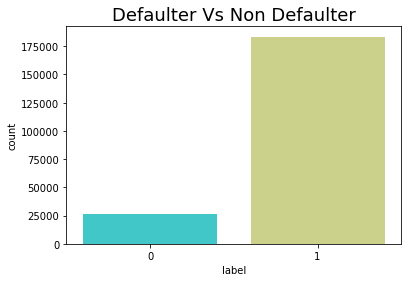

1    183431
0     26162
Name: label, dtype: int64


 0 - Failure 
 1 - Success


In [13]:
#Checking the number of defaulter and non defaulter.

sns.countplot(x='label', data=df, palette='rainbow')
plt.title('Defaulter Vs Non Defaulter', fontsize=18)
plt.show()

print(df['label'].value_counts())
print('\n')
print(' 0 - Failure', '\n', '1 - Success')

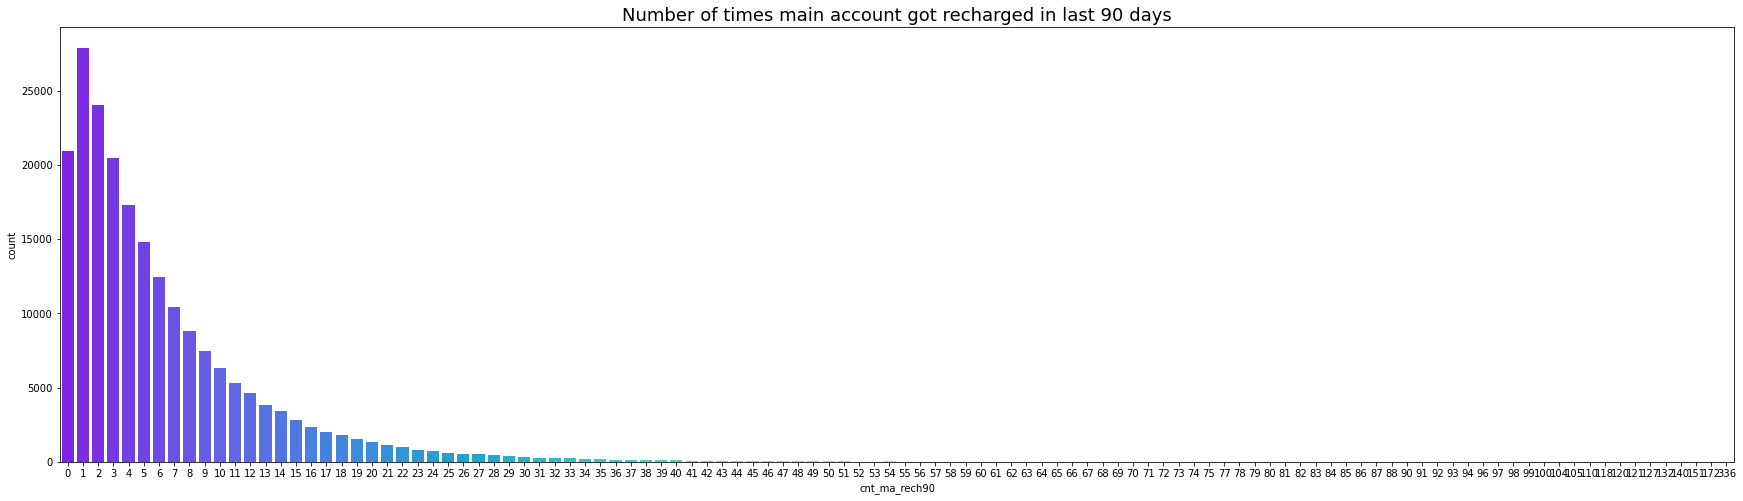

In [14]:
#Checking the number of recharges in last 90 days.

plt.subplots(figsize=(30,8))
sns.countplot(x='cnt_ma_rech90', data=df, palette='rainbow')
plt.title('Number of times main account got recharged in last 90 days', fontsize=18)
plt.show()

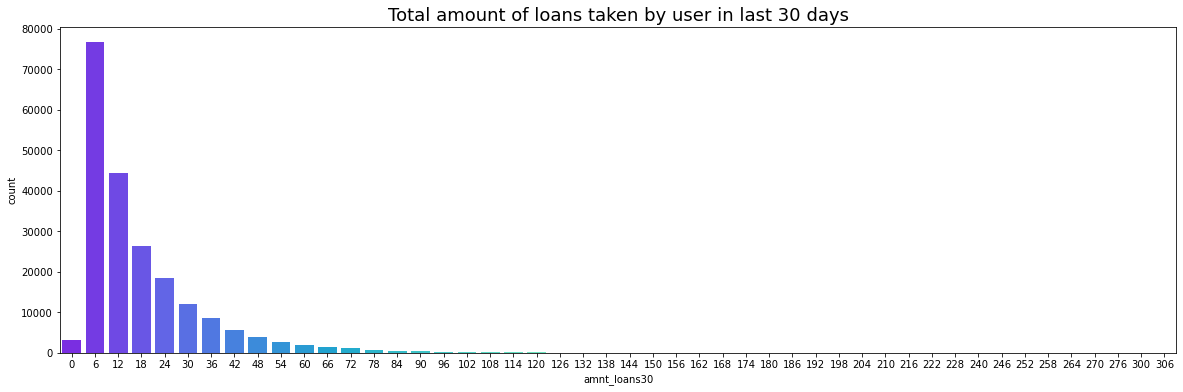

In [15]:
#Checking the Number of Total amount of loans taken by user in last 30 days

plt.subplots(figsize=(20,6))
sns.countplot(x='amnt_loans30', data=df, palette='rainbow')
plt.title('Total amount of loans taken by user in last 30 days', fontsize=18)
plt.show()

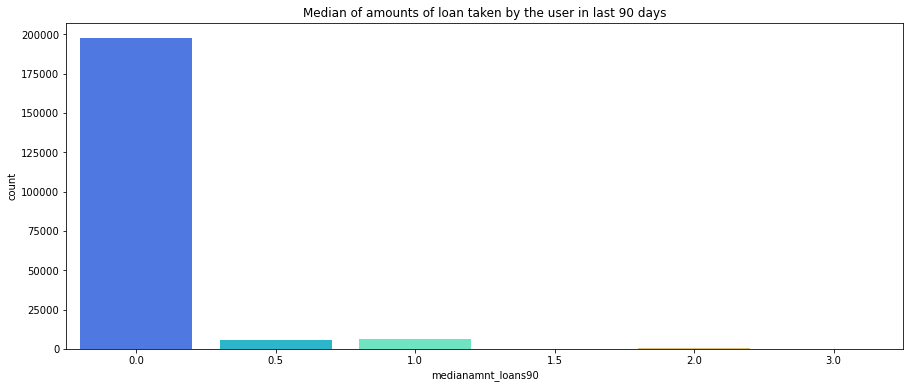

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64


In [16]:
#Checking the Median of amounts of loan taken by the user in last 90 days

plt.subplots(figsize=(15, 6))
sns.countplot(x='medianamnt_loans90', data=df, palette='rainbow')
plt.title('Median of amounts of loan taken by the user in last 90 days', fontsize=12)
plt.show()

print(df['medianamnt_loans90'].value_counts())

BIVARIATE ANALYSIS

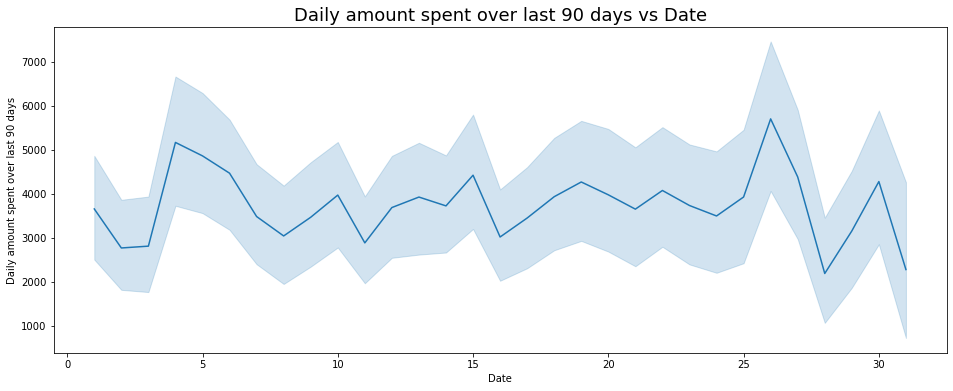

In [17]:
#using lineplot from seaborn to check Daily amount spent from main account, averaged over last 90 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="day", y="last_rech_date_ma", data=df)
plt.ylabel('Daily amount spent over last 90 days')
plt.xlabel('Date')

plt.title("Daily amount spent over last 90 days vs Date", fontsize=18)
plt.show()

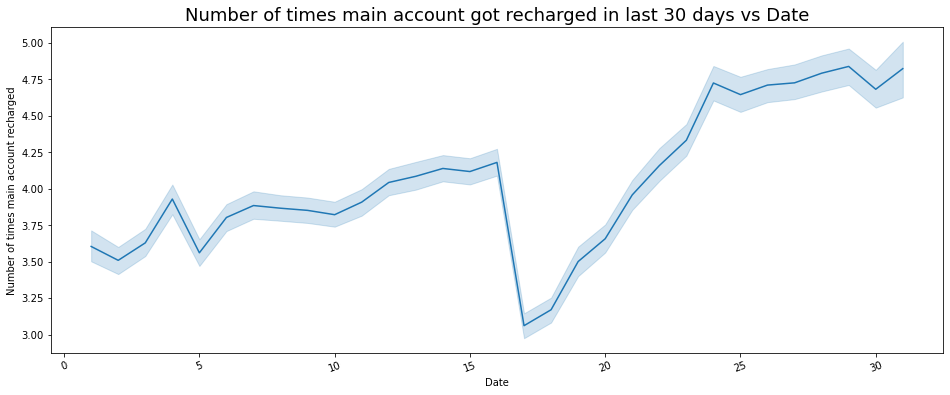

In [18]:
#using lineplot from seaborn to check Number of times main account got recharged in last 30 days vs pdate

plt.figure(figsize=(16, 6))
sns.lineplot(x="day", y="cnt_ma_rech30", data=df)
plt.ylabel('Number of times main account recharged')
plt.xlabel('Date')
plt.xticks(rotation=20)
plt.title("Number of times main account got recharged in last 30 days vs Date", fontsize=18)
plt.show()

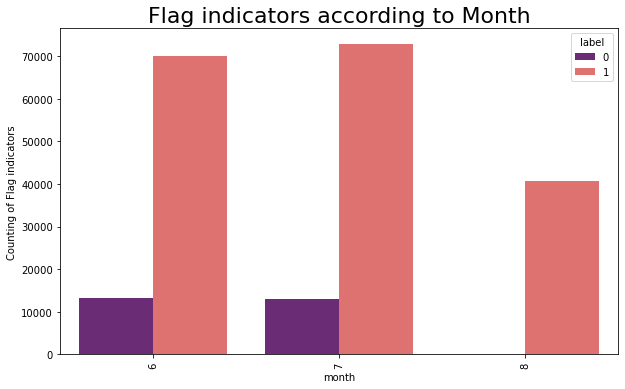

In [19]:
#Flag indicators according to Month

plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='label', data=df, palette='magma')
plt.title("Flag indicators according to Month", fontsize=22)
plt.ylabel("Counting of Flag indicators")
plt.xticks(rotation='vertical')
plt.show()

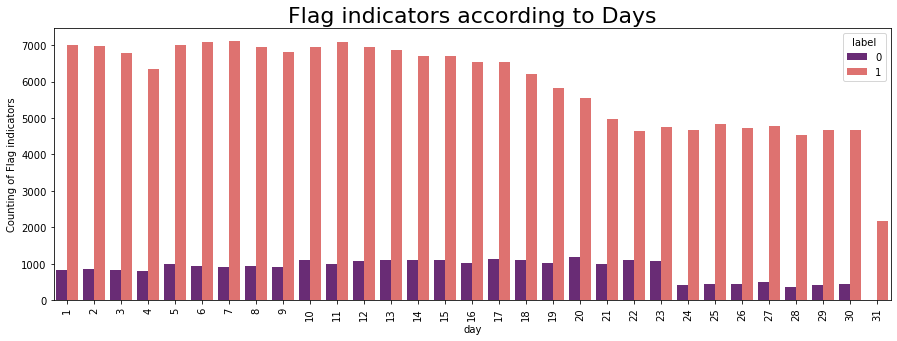

In [20]:
#Flag indicators according to days

plt.figure(figsize=(15, 5))
sns.countplot(x='day', hue='label', data=df, palette='magma')
plt.title("Flag indicators according to Days", fontsize=22)
plt.ylabel("Counting of Flag indicators")
plt.xticks(rotation='vertical')
plt.show()

# EDA

In [21]:
df.corr()

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
label,1.000000,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.006825,0.154949
daily_decr30,0.168298,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.006477,0.518664
daily_decr90,0.166150,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,-0.021508,0.539410
rental30,0.058085,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.036537,0.365699
rental90,0.075521,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.008941,0.429407
last_rech_date_ma,0.003728,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,0.000560,-0.001207
last_rech_date_da,0.001711,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,0.000631,-0.001800
last_rech_amt_ma,0.131804,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.028883,0.096919
cnt_ma_rech30,0.237331,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.068643,0.156148
fr_ma_rech30,0.001330,-0.000577,-0.000343,-0.001219,-0.000503,-0.001629,0.001158,0.002876,0.001669,1.000000,0.000714,-0.000579,0.002613,0.001220,-0.001245,-0.000571,-0.001573,-0.002826,-0.000511,-0.001715,0.001574,-0.001925,0.002666,0.002470,-0.001100,-0.000331,0.003368,0.002634,-0.001890,-0.001292,0.001455,0.000998,0.000927,-0.001682


Here we can see the correlation between the columns. For better understanding lets vizualize it through heatmap correlation

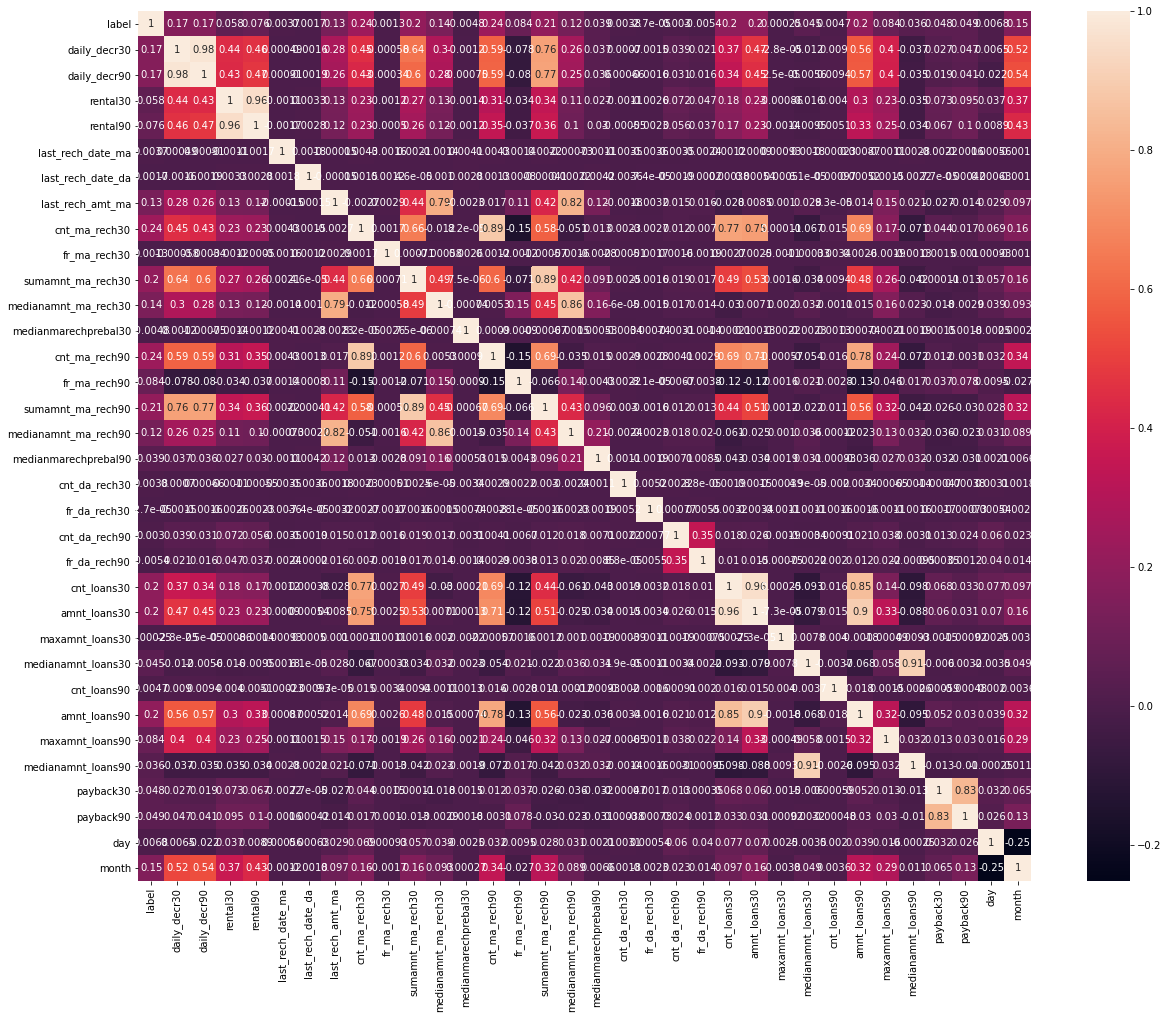

In [22]:
# heatmap correlation
import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Dark color indicates negatively corelated while light color indicates positively corelated So we ca say:
 1. In the Micro Finance Service dataset the correlation graph shows that "daily_decr30, daily_decr90" columns are highly   correlated with each other.
 2. The columns "cnt_loans30, amnt_loans30" are are highly correlated with each other.
 3. The columns "rental30, rental30" are also highly correlated with each other.

Text(0.5, 1.0, 'Correlation with Target Variable')

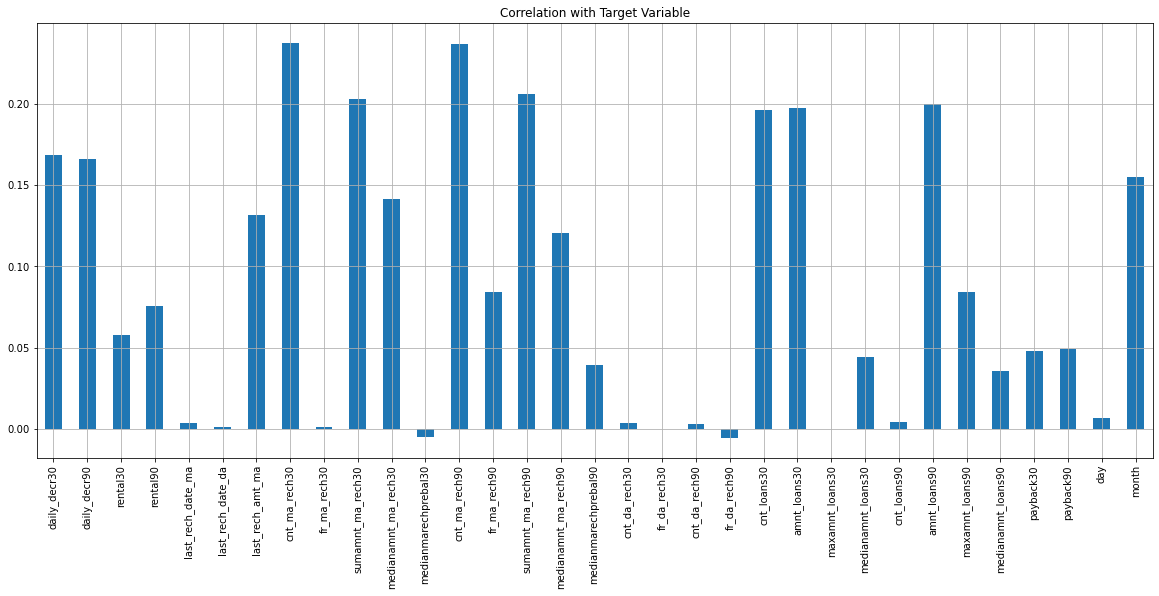

In [23]:
# lets plot a gragh showing correalation with target variable
plt.figure(figsize=(20,8))
df.drop('label',axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title('Correlation with Target Variable')

label                      AxesSubplot(0.125,0.749828;0.0945122x0.130172)
daily_decr30            AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
daily_decr90            AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
rental30                AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
rental90                AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
last_rech_date_ma       AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
last_rech_date_da       AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
last_rech_amt_ma           AxesSubplot(0.125,0.593621;0.0945122x0.130172)
cnt_ma_rech30           AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
fr_ma_rech30            AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
sumamnt_ma_rech30       AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
medianamnt_ma_rech30    AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
medianmarechprebal30    AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
cnt_ma_rech90           AxesSubplot(0.

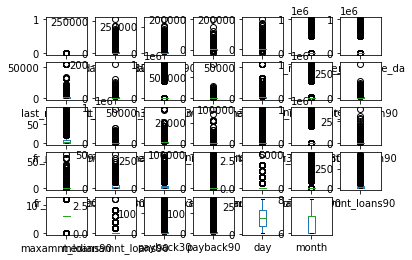

In [24]:
#plotting outliers
df.plot.box(subplots=True,layout=(5,7))

Observation:We saw the data set contains outliers but after removing it we loss more than 10% data so its clear it not outlier 
            but the property of dataset so we dont remove outliers as its not good for our analysis.

In [25]:
# checking skewness
df.skew()

label                   -2.270254
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

In [26]:
# treating skewness using log

for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.cbrt(df[col])

In [27]:
# checking skewness again
df.skew()

label                   -2.270254
daily_decr30             0.538116
daily_decr90             0.607607
rental30                 0.084165
rental90                 0.173289
last_rech_date_ma       13.755535
last_rech_date_da       14.001042
last_rech_amt_ma        -0.401954
cnt_ma_rech30           -0.566341
fr_ma_rech30            13.695845
sumamnt_ma_rech30       -0.213060
medianamnt_ma_rech30    -0.540265
medianmarechprebal30    11.578252
cnt_ma_rech90           -0.338958
fr_ma_rech90             0.362360
sumamnt_ma_rech90       -0.016530
medianamnt_ma_rech90    -0.507463
medianmarechprebal90     0.509085
cnt_da_rech30           14.792314
fr_da_rech30            14.127590
cnt_da_rech90            6.670255
fr_da_rech90            17.539627
cnt_loans30              0.269101
amnt_loans30             0.345374
maxamnt_loans30         14.597061
medianamnt_loans30       3.558178
cnt_loans90             10.411644
amnt_loans90             0.747726
maxamnt_loans90         -3.698796
medianamnt_loa

# Balancing the dataset

In [28]:
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [29]:
df_majority = df[df.label==1]
df_minority = df[df.label==0]

In [30]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=26162,     # to match minority class
                                 random_state=42)

In [31]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [32]:
df_downsampled.label.value_counts()

1    26162
0    26162
Name: label, dtype: int64

# Spliting the data into x and y 

In [33]:
#splitting the data into input and output variable
x=df_downsampled.drop(columns=['label'], axis=1)
y=df_downsampled['label']

In [34]:
#scaling in input variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

# Splitting the data for train and test

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
model=[LogisticRegression(),GaussianNB(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 

Accuracy Score of LogisticRegression() is:
0.7715427380125087
[[4548 1215]
 [1415 4334]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      5763
           1       0.78      0.75      0.77      5749

    accuracy                           0.77     11512
   macro avg       0.77      0.77      0.77     11512
weighted avg       0.77      0.77      0.77     11512



Accuracy Score of GaussianNB() is:
0.7506949270326616
[[4526 1237]
 [1633 4116]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      5763
           1       0.77      0.72      0.74      5749

    accuracy                           0.75     11512
   macro avg       0.75      0.75      0.75     11512
weighted avg       0.75      0.75      0.75     11512



Accuracy Score of SVC() is:
0.8197533009034051
[[4843  920]
 [1155 4594]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82

# Using Ensemble techniques to boost up accuracy

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [40]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 


Accuracy Score of RandomForestClassifier() is:
0.8487665045170257
[[4839  924]
 [ 817 4932]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5763
           1       0.84      0.86      0.85      5749

    accuracy                           0.85     11512
   macro avg       0.85      0.85      0.85     11512
weighted avg       0.85      0.85      0.85     11512



Accuracy Score of AdaBoostClassifier() is:
0.8211431549687283
[[4843  920]
 [1139 4610]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      5763
           1       0.83      0.80      0.82      5749

    accuracy                           0.82     11512
   macro avg       0.82      0.82      0.82     11512
weighted avg       0.82      0.82      0.82     11512



Accuracy Score of GradientBoostingClassifier() is:
0.8507644197359278
[[4925  838]
 [ 880 4869]]
              precision    recall  f1-score   support

        

# Cross Validation

In [41]:
#Cross validating the models
from sklearn.model_selection import cross_val_score
models=[LogisticRegression(), GaussianNB(),SVC(),KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), 
       AdaBoostClassifier(), GradientBoostingClassifier()]

for m in models:
    score=cross_val_score(m,x,y, cv=5, scoring='accuracy')
    print("Model:", m)
    print("Score:", score)
    print("Mean Score:", score.mean())
    print("Standard deviation:", score.std())
    print('\n')
    print('*********************************************************************')
    print('\n')

Model: LogisticRegression()
Score: [0.76464405 0.76282848 0.76655518 0.76407071 0.76146789]
Mean Score: 0.7639132626448143
Standard deviation: 0.001714362919122977


*********************************************************************


Model: GaussianNB()
Score: [0.74190158 0.74065934 0.74820831 0.74591495 0.74235474]
Mean Score: 0.7438077850881999
Standard deviation: 0.002809358848459656


*********************************************************************


Model: SVC()
Score: [0.81251792 0.81156235 0.81624462 0.81538462 0.81441131]
Mean Score: 0.814024164573626
Standard deviation: 0.0017470240886258246


*********************************************************************


Model: KNeighborsClassifier()
Score: [0.79952222 0.79722886 0.79952222 0.80458672 0.79902523]
Mean Score: 0.799977047782692
Standard deviation: 0.0024544369291866243


*********************************************************************


Model: DecisionTreeClassifier()
Score: [0.79550884 0.79053989 0.79483

# Hyperparameter Tuning for best parameters using GridSearch

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
#Using gridsearch CV to find out best parameters in RandomForestClassifier

parameters={'criterion':('gini', 'entropy'), 'n_estimators':[100, 200, 300]}
rfc=RandomForestClassifier()

clf=GridSearchCV(rfc, parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'n_estimators': 300}


In [44]:
#Using gridsearch CV to find out best parameters in Gradient Boosting Classifier

parameters={ 'n_estimators':[100, 200, 300]}

gbc=GradientBoostingClassifier()

clf=GridSearchCV(gbc, parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 300}


# Applying the best parameters to the models


In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [47]:
RFC=RandomForestClassifier(criterion='entropy', n_estimators=300)
GBC=GradientBoostingClassifier(n_estimators=300)

In [48]:
models=[]
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))


********************************* RandomForestClassifier ************************


RandomForestClassifier(criterion='entropy', n_estimators=300)


Accuracy Score: 0.8531966643502432


Cross Val Score: 0.8532987378928742


ROC_AUC_Score 0.8532078563210881


[[4864  899]
 [ 791 4958]]


Classification_report 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      5763
           1       0.85      0.86      0.85      5749

    accuracy                           0.85     11512
   macro avg       0.85      0.85      0.85     11512
weighted avg       0.85      0.85      0.85     11512



AxesSubplot(0.125,0.808774;0.775x0.0712264)



********************************* GradientBoostingClassifier ************************


GradientBoostingClassifier(n_estimators=300)


Accuracy Score: 0.8567581653926337


Cross Val Score: 0.8569681357400742


ROC_AUC_Score 0.8567479177738083


[[4986  777]
 [ 872 4877]]


Classification_report 
               p

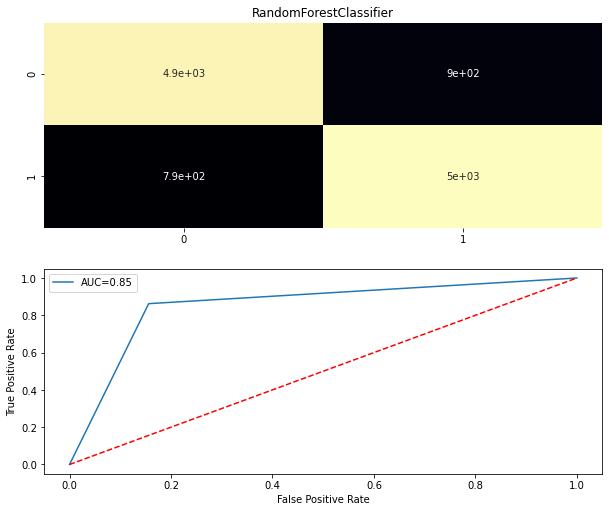

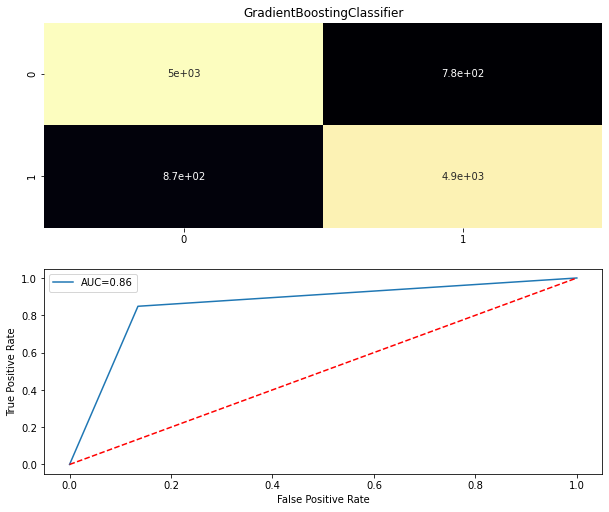

In [49]:
Model=[]
Score=[]
CVS=[]
ROC_Score=[]

for name, model in models:
    print('*********************************', name, '************************')
    print('\n')
    Model.append(name)
    
    model.fit(x_train, y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #Accuracy Score
    AS=accuracy_score(y_test, pred)
    print('Accuracy Score:', AS)
    Score.append(AS*100)
    print('\n')
    
    #Cross val score
    cross_val=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Val Score:', cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #ROC_AUC_SCORE
    false_positive_rate, true_positive_rate, threshold=roc_curve(y_test, pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('ROC_AUC_Score', roc_auc)
    ROC_Score.append(roc_auc*100)
    print('\n')
    
    #Confusion Matrix
    cm=confusion_matrix(y_test, pred)
    print(cm)
    print('\n')
    
    #Classification report
    print('Classification_report \n', classification_report(y_test, pred))
    print('\n')
    
    #Confusionmatrix via Heatmap
    plt.figure(figsize=(10, 40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm, annot=True, cbar=False, cmap='magma'))
    plt.subplot(912)
    
    #ROC Curve
    plt.plot(false_positive_rate, true_positive_rate, label='AUC=%.2f'%roc_auc)
    plt.plot([0,1], [0,1], 'r--')
    plt.legend(loc='Lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [50]:
#Storing the results in dataframe

result=pd.DataFrame({'Model': models, 'Accuracy_Score': Score, 'Cross_Val_Score':CVS, 'ROC_AUC_Score': ROC_Score})

result

,Model,Accuracy_Score,Cross_Val_Score,ROC_AUC_Score
0,"(RandomForestClassifier, (DecisionTreeClassifi...",85.319666,85.329874,85.320786
1,"(GradientBoostingClassifier, ([DecisionTreeReg...",85.675817,85.696814,85.674792


In [53]:
#saving this model Gradient Boosting Classifier as finalised model

import joblib

#saving the model as a pickle in a file
joblib.dump(GBC, 'MFS_Dataset.pkl')

['MFS_Dataset.pkl']